<h1>Import Libraries and Data</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
income = pd.read_csv('adult.csv')

<h1>1. Preliminary Data Analysis</h1>

<h2>1.1. Columns and types</h2>

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h2>1.2. Data</h2>

In [4]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<h2>1.3 Summary Statistics</h2>

In [5]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<h1>2. Data Wrangling</h1>

In [6]:
#Check for null values
income.isnull().sum().values.sum()

0

<h2>2.1 Find proportions of missing values in each category</h2>

In [7]:
income_missing = pd.concat([(income=='?').sum(), 100 * (income=='?').mean()], axis=1)
income_missing.columns=['Count', '%']
income_missing.sort_values(by=['Count', '%'], ascending=False)

,Count,%
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


<h2>2.2 Count of entries in each category</h2>

In [8]:
income['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
income['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [10]:
income['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
income['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

<h2>2.3. Drop missing values</h2>
<p>The missing values for the occupation and workclass categories make up less than 6% of the 48,842 entries, so they will be dropped.</p>

In [12]:
income.drop(index=income[income['occupation'] == '?'].index, inplace=True)

In [13]:
income.drop(index=income[income['workclass'] == '?'].index, inplace=True)

In [14]:
income.drop(index=income[income['native-country'] == '?'].index, inplace=True)

<h2>2.4. Correlation matrix</h2>

([<matplotlib.axis.YTick at 0x2327bc0d370>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'fnlwgt'),
  Text(0, 2, 'educational-num'),
  Text(0, 3, 'capital-gain'),
  Text(0, 4, 'capital-loss'),
  Text(0, 5, 'hours-per-week')])

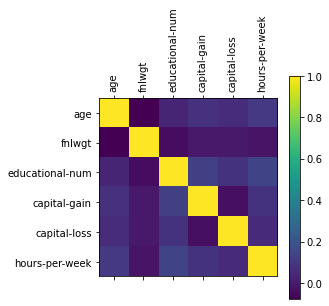

In [15]:
plt.matshow(income.corr())
plt.colorbar()
plt.xticks(np.arange(len(income.corr().columns)), income.corr().columns.values, rotation = 90) 
plt.yticks(np.arange(len(income.corr().columns)), income.corr().columns.values) 

The correlation matrix above shows very low linear correlations between the continuous features and income.

In [16]:
# Convert income column into numerical classes and create a new column for income that shows '1' for incomes greater than $50K and '0' for incomes that are not

income['Income_Above_or_Below_50K'] = income.apply(lambda row: 1 if '>50K' in row['income'] else 0, axis=1)

In [17]:
# Remove unwanted columns
income = income.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'native-country', 'income'], axis=1)
income.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,Income_Above_or_Below_50K
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,0


<h1>3. Data Visualization</h1>

<h2>3.1. Comparing income by education level</h2>

In [18]:
#Make a dictionary pairing the education level with its corresponding number
edu_level = {}
for x,y in income[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion')

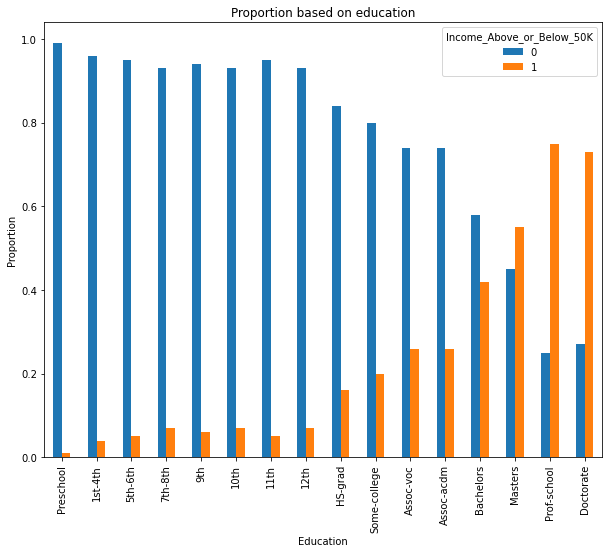

In [19]:
education = round(pd.crosstab(income.education, income.Income_Above_or_Below_50K).div(pd.crosstab(income.education, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion based on education', figsize = (10,8))
ax.set_xlabel('Education')
ax.set_ylabel('Proportion')

As expected, the higher the education level, the greater the proportion of adults with incomes over 50K. From the master's level and up, adults making more than 50K outnumber adults making 50K or less.

In [20]:
print(education)

Income_Above_or_Below_50K     0     1
education                            
Preschool                  0.99  0.01
1st-4th                    0.96  0.04
5th-6th                    0.95  0.05
7th-8th                    0.93  0.07
9th                        0.94  0.06
10th                       0.93  0.07
11th                       0.95  0.05
12th                       0.93  0.07
HS-grad                    0.84  0.16
Some-college               0.80  0.20
Assoc-voc                  0.74  0.26
Assoc-acdm                 0.74  0.26
Bachelors                  0.58  0.42
Masters                    0.45  0.55
Prof-school                0.25  0.75
Doctorate                  0.27  0.73


<h2>3.2. Comparing Income by WorkClass</h2>

Text(0, 0.5, 'Proportion')

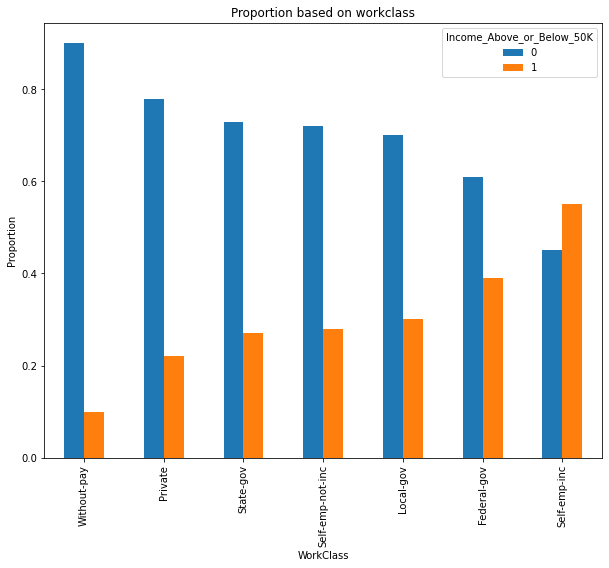

In [21]:
workclass = round(pd.crosstab(income.workclass, income.Income_Above_or_Below_50K).div(pd.crosstab(income.workclass, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
workclass.sort_values(by = 1, inplace = True)

ax = workclass.plot(kind ='bar', title = 'Proportion based on workclass', figsize = (10,8))
ax.set_xlabel('WorkClass')
ax.set_ylabel('Proportion')

Among the adults with pay, those in the private class have the lowest proportion of incomes over 50K, while those self-employed in incorporated businesses have not only the greatest proportion of incomes over 50K, but adults making more than 50K outnumber those that are not.

In [22]:
print(workclass)

Income_Above_or_Below_50K     0     1
workclass                            
Without-pay                0.90  0.10
Private                    0.78  0.22
State-gov                  0.73  0.27
Self-emp-not-inc           0.72  0.28
Local-gov                  0.70  0.30
Federal-gov                0.61  0.39
Self-emp-inc               0.45  0.55


<h2>3.3. Comparing Income by Occupation</h2>

Text(0, 0.5, 'Proportion')

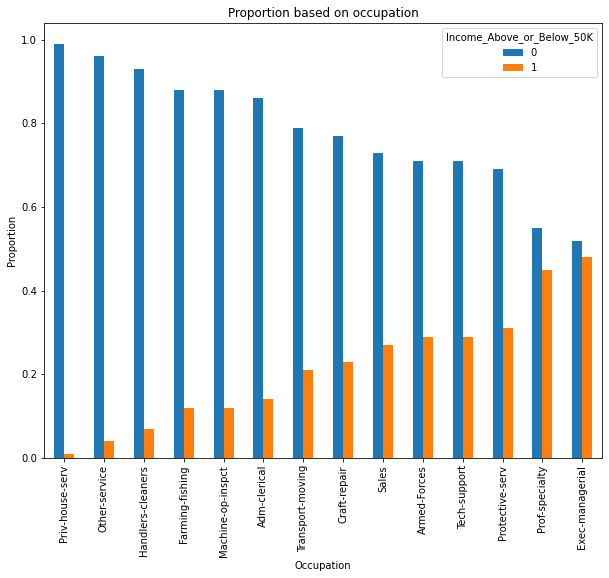

In [23]:
occupation = round(pd.crosstab(income.occupation, income.Income_Above_or_Below_50K).div(pd.crosstab(income.occupation, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
occupation.sort_values(by = 1, inplace = True)

ax = occupation.plot(kind ='bar', title = 'Proportion based on occupation', figsize = (10,8))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion')

All occupations have more adults with incomes $50K or less than adults with greater incomes. The difference is least with executive managerial positions, followed closely by specialized professionals such as doctors and lawyers.

In [24]:
print(occupation)

Income_Above_or_Below_50K     0     1
occupation                           
Priv-house-serv            0.99  0.01
Other-service              0.96  0.04
Handlers-cleaners          0.93  0.07
Farming-fishing            0.88  0.12
Machine-op-inspct          0.88  0.12
Adm-clerical               0.86  0.14
Transport-moving           0.79  0.21
Craft-repair               0.77  0.23
Sales                      0.73  0.27
Armed-Forces               0.71  0.29
Tech-support               0.71  0.29
Protective-serv            0.69  0.31
Prof-specialty             0.55  0.45
Exec-managerial            0.52  0.48


<h2>3.4. Comparing Income by Marital Status</h2>

Text(0, 0.5, 'Proportion')

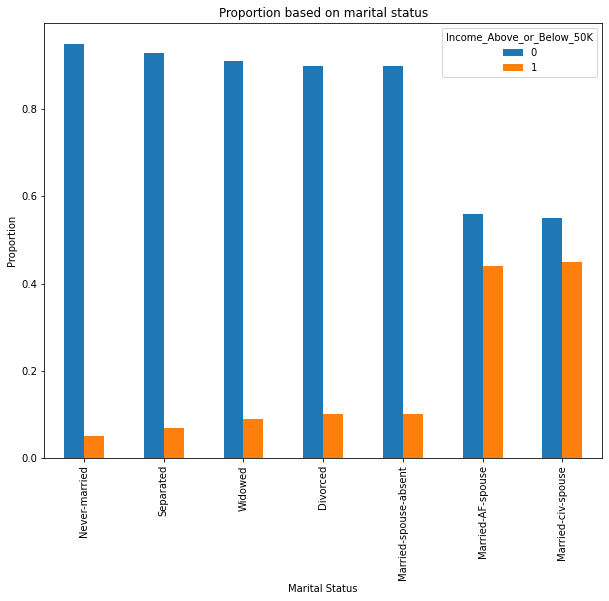

In [25]:
marital = round(pd.crosstab(income['marital-status'], income.Income_Above_or_Below_50K).div(pd.crosstab(income['marital-status'], income.Income_Above_or_Below_50K).apply(sum,1),0),2)
marital.sort_values(by = 1, inplace = True)

ax = marital.plot(kind ='bar', title = 'Proportion based on marital status', figsize = (10,8))
ax.set_xlabel('Marital Status')
ax.set_ylabel('Proportion')

All categories have more adults with incomes of 50K or less than adults with incomes over 50K, but the gap is much smaller with married couples that have a spouse present.

In [26]:
print(marital)

Income_Above_or_Below_50K     0     1
marital-status                       
Never-married              0.95  0.05
Separated                  0.93  0.07
Widowed                    0.91  0.09
Divorced                   0.90  0.10
Married-spouse-absent      0.90  0.10
Married-AF-spouse          0.56  0.44
Married-civ-spouse         0.55  0.45


<h2>3.4. Comparing Income by Relationship</h2>

Text(0, 0.5, 'Proportion')

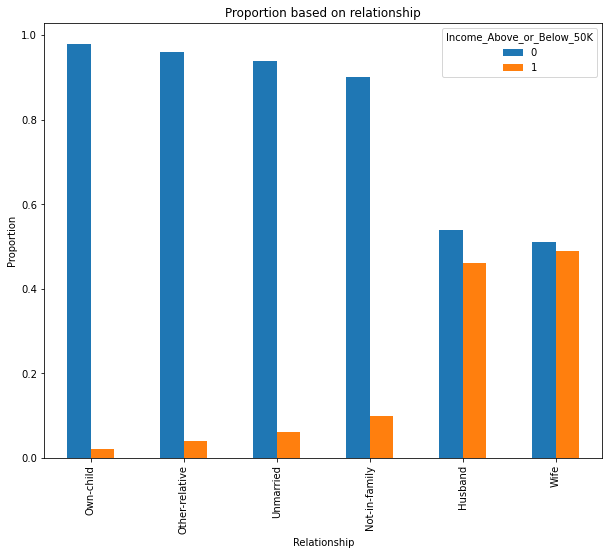

In [27]:
relationship = round(pd.crosstab(income.relationship, income.Income_Above_or_Below_50K).div(pd.crosstab(income.relationship, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
relationship.sort_values(by = 1, inplace = True)

ax = relationship.plot(kind ='bar', title = 'Proportion based on relationship', figsize = (10,8))
ax.set_xlabel('Relationship')
ax.set_ylabel('Proportion')

All categories have more adults with incomes of 50K or less than adults with incomes over 50K, but the gap is much smaller with husbands and wives. This makes sense because of similarly small gaps in the categories of married couples with the spouse present.

In [28]:
print(relationship)

Income_Above_or_Below_50K     0     1
relationship                         
Own-child                  0.98  0.02
Other-relative             0.96  0.04
Unmarried                  0.94  0.06
Not-in-family              0.90  0.10
Husband                    0.54  0.46
Wife                       0.51  0.49


<h2>3.5. Comparing Income by Race</h2>

Text(0, 0.5, 'Proportion')

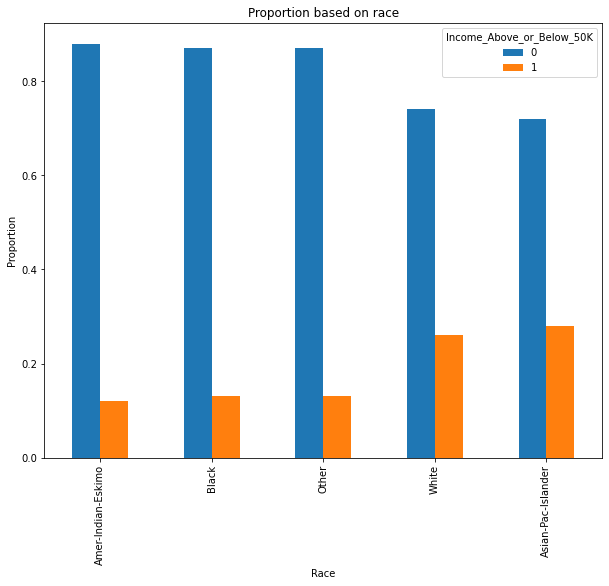

In [29]:
race = round(pd.crosstab(income.race, income.Income_Above_or_Below_50K).div(pd.crosstab(income.race, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
race.sort_values(by = 1, inplace = True)

ax = race.plot(kind ='bar', title = 'Proportion based on race', figsize = (10,8))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion')

Whites and Asians have higher proportions of adults with incomes over 50K.

In [30]:
print(race)

Income_Above_or_Below_50K     0     1
race                                 
Amer-Indian-Eskimo         0.88  0.12
Black                      0.87  0.13
Other                      0.87  0.13
White                      0.74  0.26
Asian-Pac-Islander         0.72  0.28


<h2>3.6. Comparing Income by Gender</h2>

Text(0, 0.5, 'Proportion')

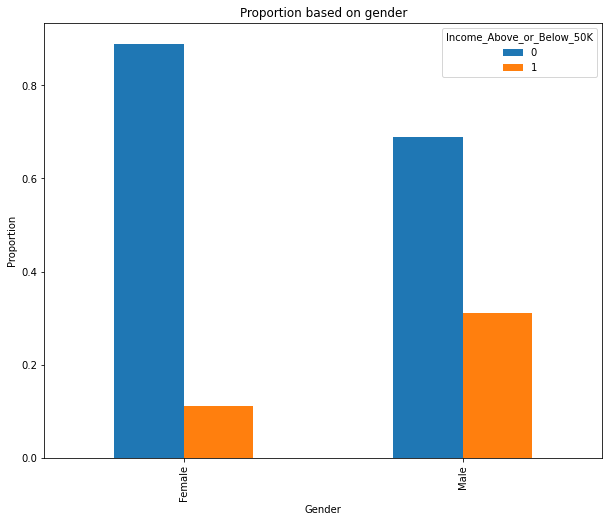

In [31]:
gender = round(pd.crosstab(income.gender, income.Income_Above_or_Below_50K).div(pd.crosstab(income.gender, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
gender.sort_values(by = 1, inplace = True)

ax = gender.plot(kind ='bar', title = 'Proportion based on gender', figsize = (10,8))
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')

Men have a higher proportion of incomes over 50K.

In [32]:
print(gender)

Income_Above_or_Below_50K     0     1
gender                               
Female                     0.89  0.11
Male                       0.69  0.31


<h2>3.7. Comparing Income by Hours Per Week</h2>

Text(0, 0.5, 'Proportion')

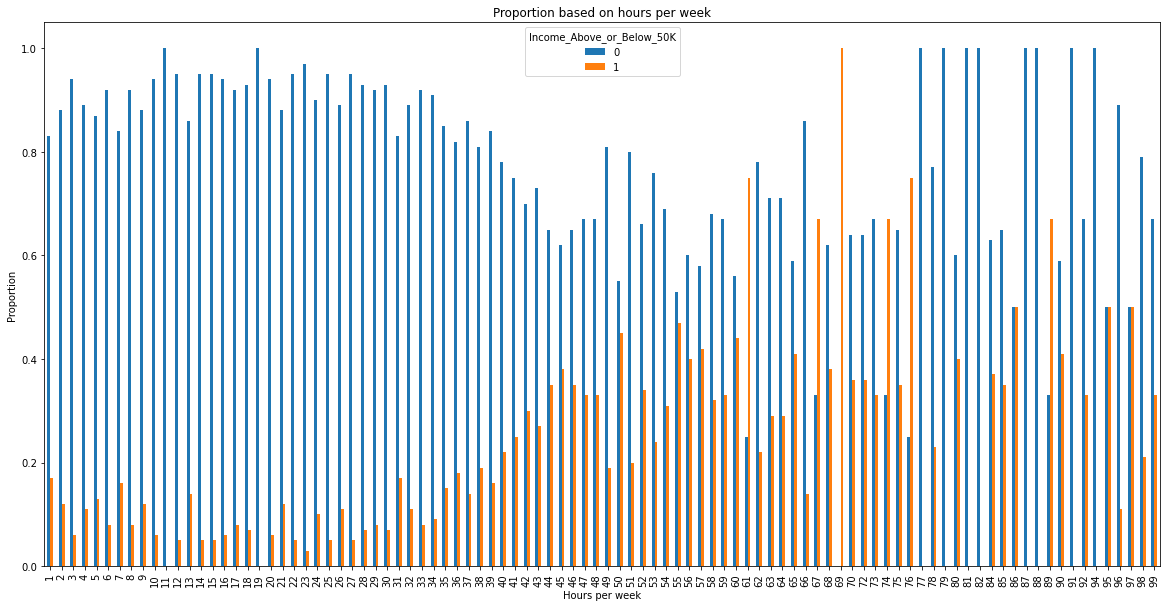

In [33]:
hours_per_week = round(pd.crosstab(income['hours-per-week'], income.Income_Above_or_Below_50K).div(pd.crosstab(income['hours-per-week'], income.Income_Above_or_Below_50K).apply(sum,1),0),2)

ax = hours_per_week.plot(kind ='bar', title = 'Proportion based on hours per week', figsize = (20,10))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion')

The lowest number of hours worked in which incomes over 50K outnumber incomes of 50K and under is 61. However, more hours worked does not necessarily mean more incomes over 50K than incomes 50K and under. In fact, there are no incomes over 50K at 77, 79, 81, 82, 87, 88, 91, and 94 hours.

In [34]:
#export cleaned data as CSV
income.to_csv('income_cleaned.csv')